In [19]:
# !pip install 'gym[box2d]'
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install https://github.com/pyglet/pyglet/archive/pyglet-1.5-maintenance.zip
# !apt-get install ffmpeg -y

In [20]:
# env.render() gives error in Colab
# below code solves display error
# https://github.com/openai/gym/issues/1898


from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from maze_env import Maze
from utils import plot_policy, plot_values, test_agent,plot_action_values

np.random.seed(34)

In [22]:
# initialze the env
env = Maze()

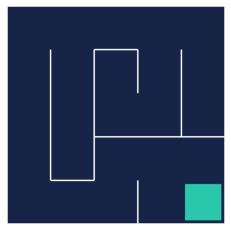

In [23]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [24]:
# intialize action value table Q(s,a)
action_values = np.zeros((5,5,4))

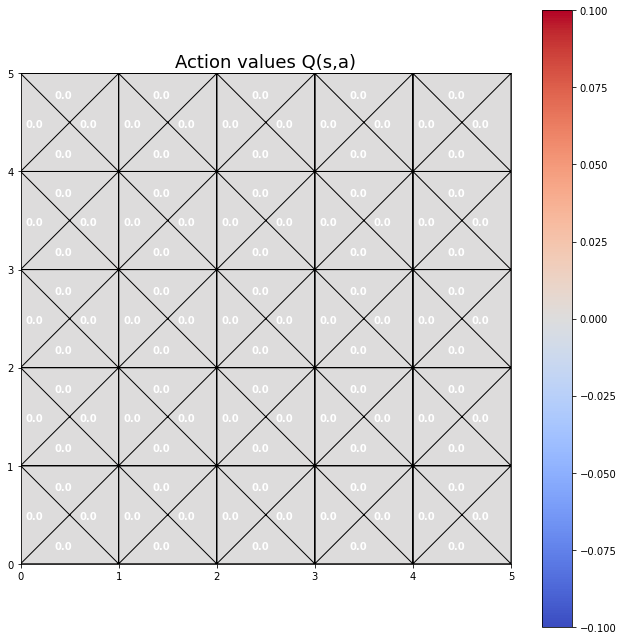

In [25]:
# plot action value
plot_action_values(action_values)

In [26]:
#  define policy
def policy(state,epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av==av.max()))

In [27]:
# test the policy
action = policy((0,0),epsilon=0.5)
action

2

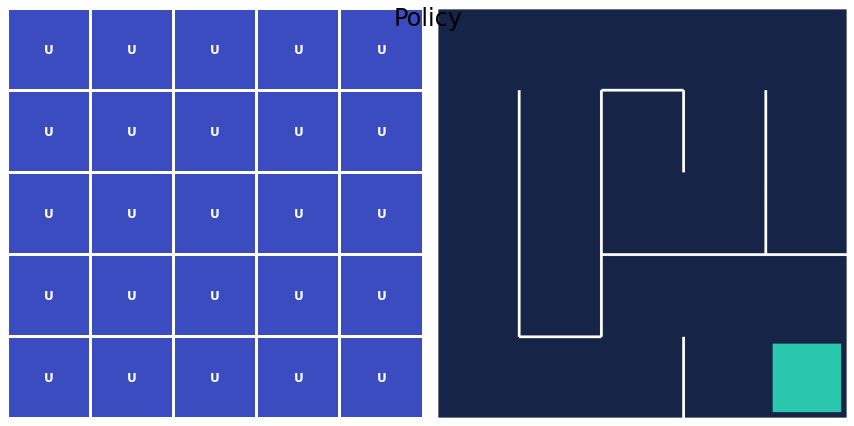

In [28]:
plot_policy(action_values,frame)

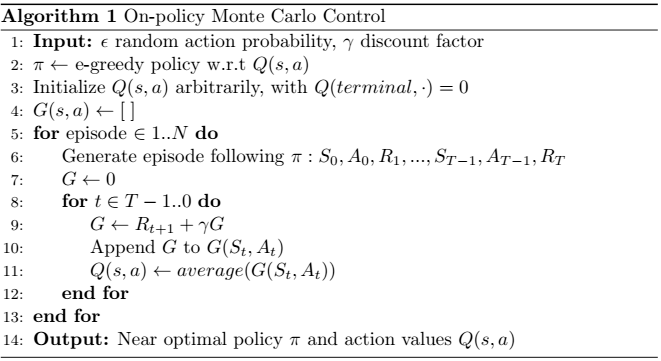

In [29]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
    
    sa_returns = {}

    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = policy(state,epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state,action,reward])
            state = next_state
        
        G = 0  # initialize return

        # compute return from last state to the first state

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G

            if not (state_t,action_t) in sa_returns:
                sa_returns[(state_t,action_t)] = []

            sa_returns[(state_t,action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t,action_t)])

In [30]:
on_policy_mc_control(policy,action_values,episodes=10000)

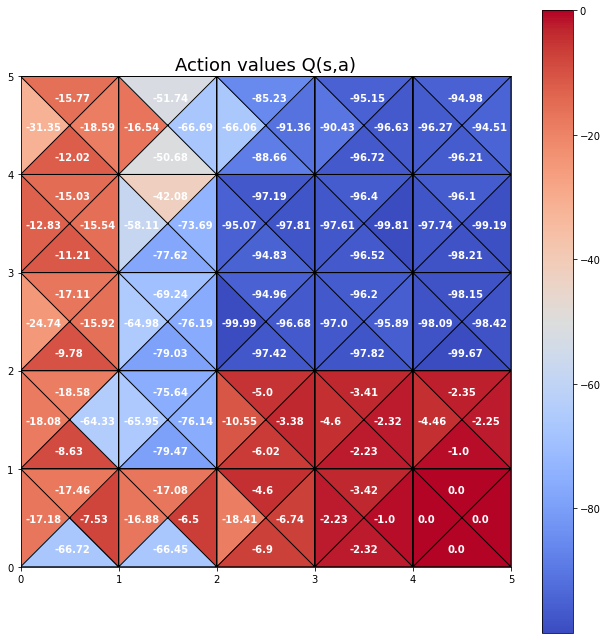

In [31]:
plot_action_values(action_values)

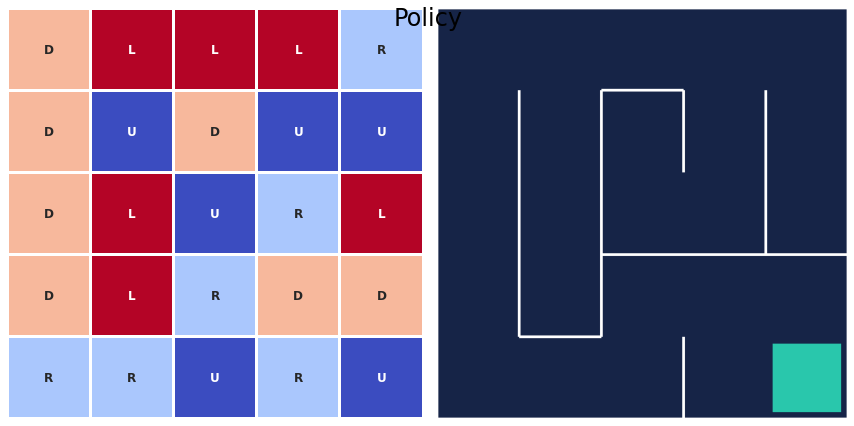

In [32]:
plot_policy(action_values,frame)

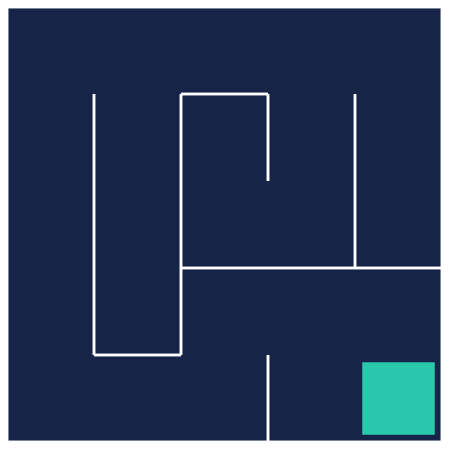

In [33]:
test_agent(env,policy, episodes=1)